In [11]:
import pandas as pd, numpy as np, json, os
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
m=json.loads(open('ignore/member_timelines.json','r').read())

In [13]:
set([i['Csoportok'] for i in m if i['Típus']=='Párt'])

{'⚛️ PP-DD - Partidul Poporului Dan Diaconescu',
 '⚪️ FDSN - Frontul Democrat al Salvarii Nationale',
 '⚪️ FSN - Frontul Salvării Naţionale',
 '✳️ PNTCD - Partidul Naţional Ţărănesc Creştin Democrat',
 '🌷 RMDSZ - Romániai Magyar Demokrata Szövetség',
 '🌹 PDSR - Partidul Democraţiei Sociale din România',
 '🌹 PSD - Partidul Social Democrat',
 '🌹 PSDR - Partidul Social Democrat Român',
 '🌹 PSM - Partidul Socialist al Muncii',
 '🍀 FER - Federaţia Ecologistă Română',
 '🍀 MER - Mişcarea Ecologistă din România',
 '🍀 PDAR - Partidul Democrat Agrar din România',
 '🍀 PER - Partidul Ecologist Român',
 '🍏 PMP - Partidul Mişcarea Populară',
 '👤 Independent - Independent',
 '👤 Minorități - Minorități',
 '📐 PAC - Partidul Alianţei Civice',
 "📐 PL'93 - Partidul Liberal",
 '📐 PNL - Partidul Naţional Liberal',
 '📐 PNL-AT - Partidul Naţional Liberal',
 '📐 PNL-CD - Partidul Naţional Liberal',
 '🔘 AUR - Alianţa pentru Unitatea Românilor',
 '🔘 FC - Forţa Civică',
 '🔘 GDC - Gruparea Democratică de Centru',
 

In [299]:
# m=m[:1000]

In [14]:
data={'Ország':{},'Bizottság':{},'Párt':{},'Megye':{}}
attention={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in list(data.keys()):
        if i['Csoportok'] not in data[i['Típus']]:data[i['Típus']][i['Csoportok']]={}
        for t in pd.date_range(i['start'],i['end']):
            st=str(t)[:10]
            if st not in data[i['Típus']][i['Csoportok']]:data[i['Típus']][i['Csoportok']][st]=set()
            data[i['Típus']][i['Csoportok']][st].add(name)            
            if name not in attention:attention[name]={}
            if st not in attention[name]:attention[name][st]=0
            attention[name][st]+=1

0.0 %
3.3029462280354074 %
6.605892456070815 %
9.908838684106223 %
13.21178491214163 %
16.514731140177037 %
19.817677368212447 %
23.120623596247853 %
26.42356982428326 %
29.72651605231867 %
33.029462280354075 %
36.332408508389484 %
39.635354736424894 %
42.938300964460296 %
46.241247192495706 %
49.544193420531116 %
52.84713964856652 %
56.15008587660193 %
59.45303210463734 %
62.75597833267275 %
66.05892456070815 %
69.36187078874356 %
72.66481701677897 %
75.96776324481438 %
79.27070947284979 %
82.57365570088518 %
85.87660192892059 %
89.179548156956 %
92.48249438499141 %
95.78544061302682 %
99.08838684106223 %


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


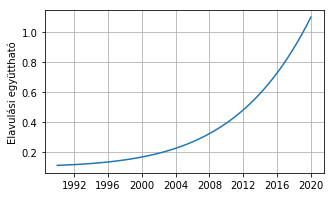

In [15]:
def anneal(t,p=7):
    #pd.to_datetime('2020-01-01')-pd.to_datetime('1989-01-01')=11322
    return (2-(pd.to_datetime('2020-01-01')-pd.to_datetime(t)).days/11322)**p
    
tanneal={}
anneal2020=anneal(pd.to_datetime('2020'))
for t in pd.date_range('1990','2020'):
    tanneal[t]=anneal(t)/anneal2020+0.1
    tanneal[str(t)[:10]]=tanneal[t]
plt.subplots(1,1,figsize=(5,3))
plt.grid()
plt.plot(tanneal.keys(),tanneal.values())
plt.ylabel('Elavulási együttható')
plt.show()

In [ ]:
edges={}
points={'Ország':3,'Bizottság':4,'Párt':2,'Megye':1}
for tipus in data:
    for csoport in data[tipus]:
        print(csoport)
        for t in data[tipus][csoport]:
            names=list(data[tipus][csoport][t])
            for r in range(len(names)):
                name=names[r]
                for p in range(r+1,len(names)):
                    name2=names[p]
                    nset=tuple(np.sort([name,name2]))
                    v=points[tipus]
                    if nset not in edges:edges[nset]={'anneal':0,'values':0}
                    edges[nset]['values']+=v
                    edges[nset]['anneal']+=v*tanneal[t]

🇨🇳 Kína
🇫🇮 Finnország
🇮🇱 Izrael
🇳🇴 Norvégia
🇩🇪 Németország
🇱🇺 Luxemburg
🇳🇱 Hollandia
🇨🇿 Czechia
🇭🇺 Magyarország
🇱🇧 Libanon
🇦🇹 Ausztria
🇩🇰 Dánia
🇮🇳 India
🇵🇹 Portugália
🇸🇮 Szlovénia
🇵🇪 Peru
🇵🇱 Lengyelország
🇧🇬 Bulgária
🇧🇭 Bahrein
🇯🇵 Japán
🇻🇪 Venezuela
🇧🇾 Fehéroroszország
🇪🇸 Spanyolország
🇲🇽 Mexikó
🇺🇦 Ukrajna
🇨🇦 Kanada
🇬🇧 Egyesült Királyság
🇰🇷 Dél-Korea
🇧🇪 Belgium
🇬🇪 Grúzia
🇲🇳 Mongólia
🇷🇺 Oroszország
🇫🇷 Franciaország
🇮🇹 Olaszország
🇸🇰 Szlovákia
Más ország
🇱🇻 Lettország
🇹🇷 Törökország
🇦🇿 Azerbajdzsán
🇪🇬 Egyiptom
🇲🇦 Marokkó
🇹🇳 Tunézia
🇺🇸 Egyesült Államok
🇮🇩 Indonézia
🇦🇲 Örményország
🇧🇷 Brazília
🇨🇭 Svájc
🇬🇷 Görögország
🇮🇸 Izland
🇸🇾 Szíria
🇨🇷 Costa Rica
🇯🇴 Jordánia
🇨🇮 Elefántcsontpart
🇮🇷 Irán
🇸🇪 Svédország
🇦🇺 Ausztrália
🇪🇨 Ecuador
🇦🇱 Albánia
🇪🇪 Észtország
🇨🇺 Kuba
🇱🇹 Litvánia
🇹🇲 Türkmenisztán
🇵🇦 Panama
🇨🇱 Chile
🇲🇰 Macedónia
🇦🇷 Argentína
🇭🇷 Horvátország
🇹🇭 Thaiföld
🇲🇾 Malajzia
🇨🇾 Ciprus
🇮🇪 Írország
🇿🇦 Dél-Afrika
🇻🇳 Vietnam
🇧🇴 Bolívia
🇸🇩 Szudán
🇺🇾 Uruguay
🇩🇿 Algéria
🇵🇰 Pakisztán
🇷🇸 Szerbia
🇵🇭 Fü

Save

In [ ]:
import pickle

In [ ]:
def save_obj(obj, name ):
    with open('ignore/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('ignore/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
save_obj(edges,'plotter_name_edges')

In [82]:
edges=load_obj('plotter_name_edges')

Prune

In [ ]:
df=pd.DataFrame(edges).T

In [ ]:
all_nodes=set(df.reset_index()['level_0']).union(df.reset_index()['level_1'])

In [ ]:
min_baratsag=500
df2=df[df['anneal']>min_baratsag]

In [ ]:
df2['regi']=df2['anneal']/df2['values']

In [ ]:
df2=df2['anneal'].reset_index()

In [ ]:
df2.columns=['source','target','weight']

In [ ]:
nodes={}
for i in all_nodes:
    if i not in nodes:
        nodes[i]={'pr':0,'bc':0,'cf':0}

In [ ]:
G=nx.Graph(df2)

In [ ]:
r = nx.pagerank(G,weight='weight')
mr=np.median(list(r.values()))
for i in r:
    nodes[i]['pr']=r[i]/mr

In [ ]:
Gc = max(nx.connected_component_subgraphs(G), key=len)
r = nx.current_flow_closeness_centrality(Gc,weight='weight')
mr=np.median(list(r.values()))
for i in r:
    nodes[i]['cf']=r[i]/mr

In [ ]:
links={}
for i in G.edges(data=True):
    name=i[0]
    name2=i[1]
    z=i[2]['weight']
    if name not in links:links[name]={}
    if name2 not in links:links[name2]={}
    links[name][name2]=z
    links[name2][name]=z

In [ ]:
#save 
network={'nodes':nodes,'links':links}
print(len(nodes),'nodes and',len(G.edges()),'edges')

In [ ]:
open('ignore/plotter_name.json','w').write(json.dumps(network))

In [ ]:
import zipfile

with zipfile.ZipFile("json/plotter_name.zip", "w", compression=zipfile.ZIP_DEFLATED) as zf:
    zf.write("ignore/plotter_name.json",'plotter_name.json')